Clustering the Countries by using Unsupervised Learning for HELP International.

Task : To categorise the countries using socio-economic and health factors that determine the overall development of the country.

About organization: HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

Problem Statement: HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. In this notebook I categorise the countries using some socio-economic and health factors that determine the overall development of the country, and help to suggest the countries which the needed the most focus.

In [231]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [232]:

country_df = pd.read_csv("Country-data.csv")
description = pd.read_csv("data-dictionary.csv")

In [233]:
country_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [234]:
country_df.nunique()

country       167
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
life_expec    127
total_fer     138
gdpp          157
dtype: int64

In [235]:
description

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [236]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [237]:
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [238]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


there are some outliers on most of the variables. I kept thoses outliers because they might represent countries in a very bad socio economic condition and could be eligible for finance help.
'Income' and 'GDPP' have  wide difference of min and max from mean, and 75% .



Plotting the correlation between each numerical feature

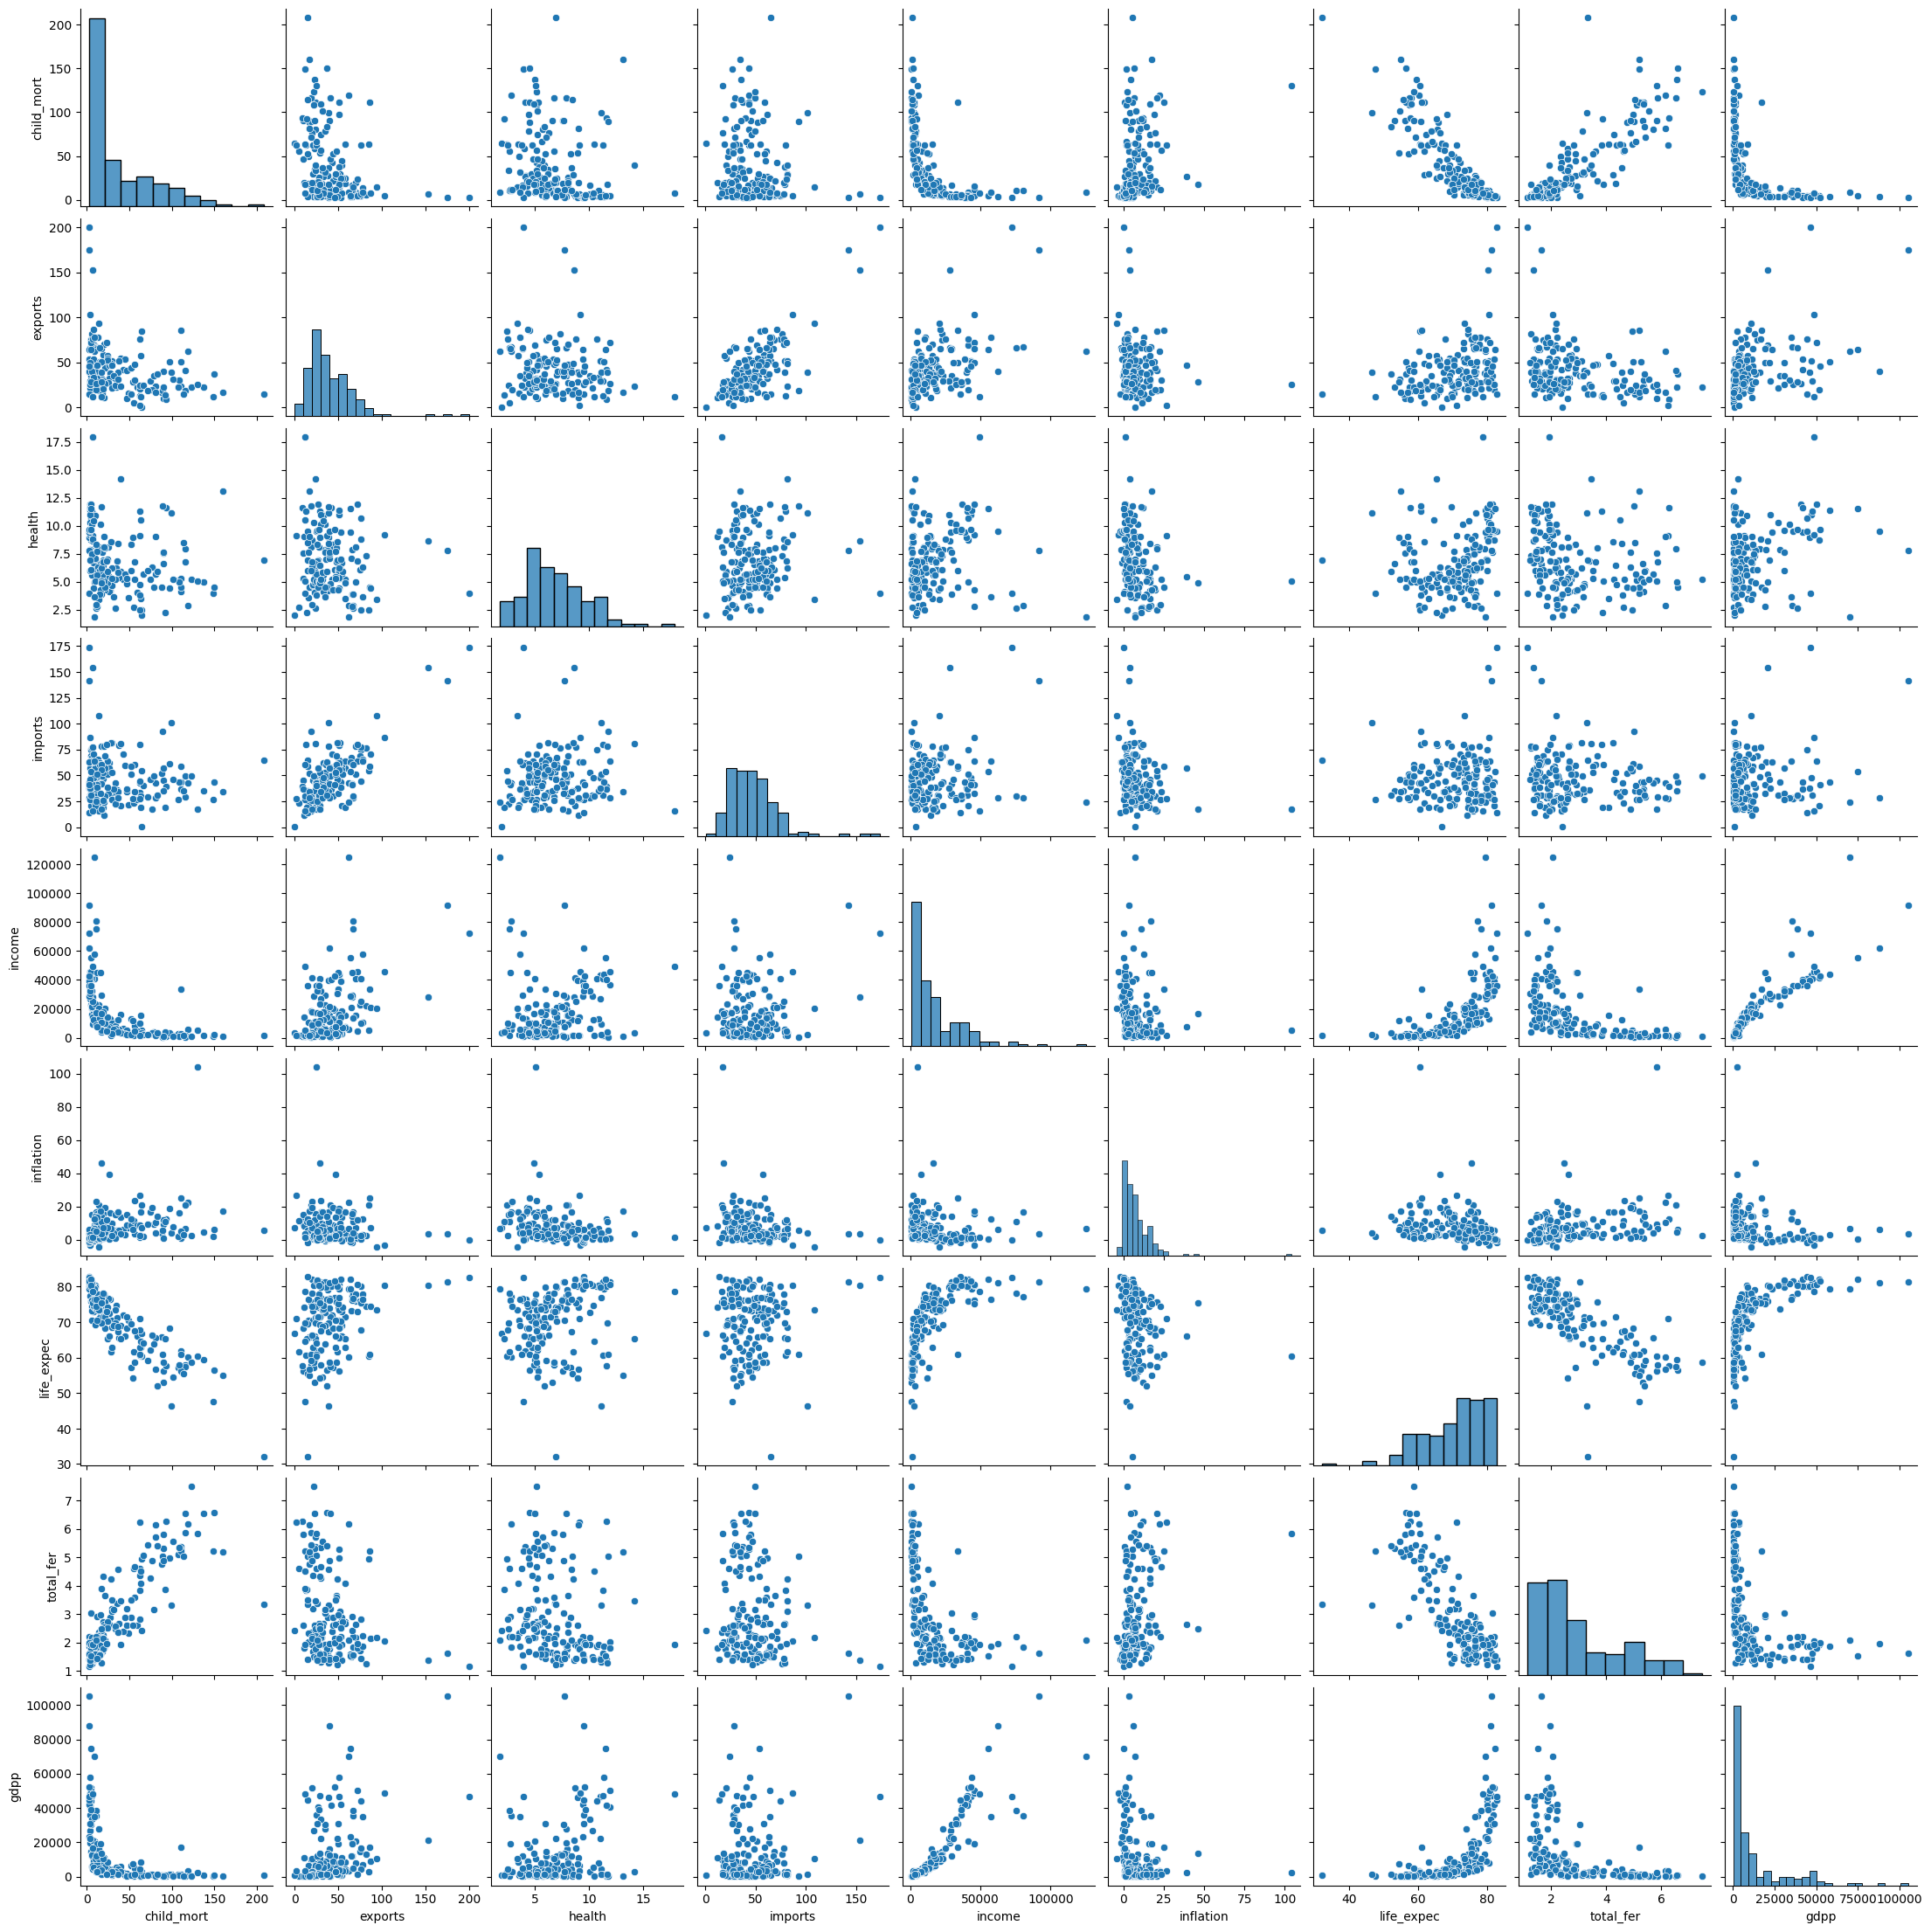

In [239]:
sns.pairplot(country_df)

C:\Users\shazi\AppData\Local\Temp\ipykernel_34364\1725144879.py:3: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



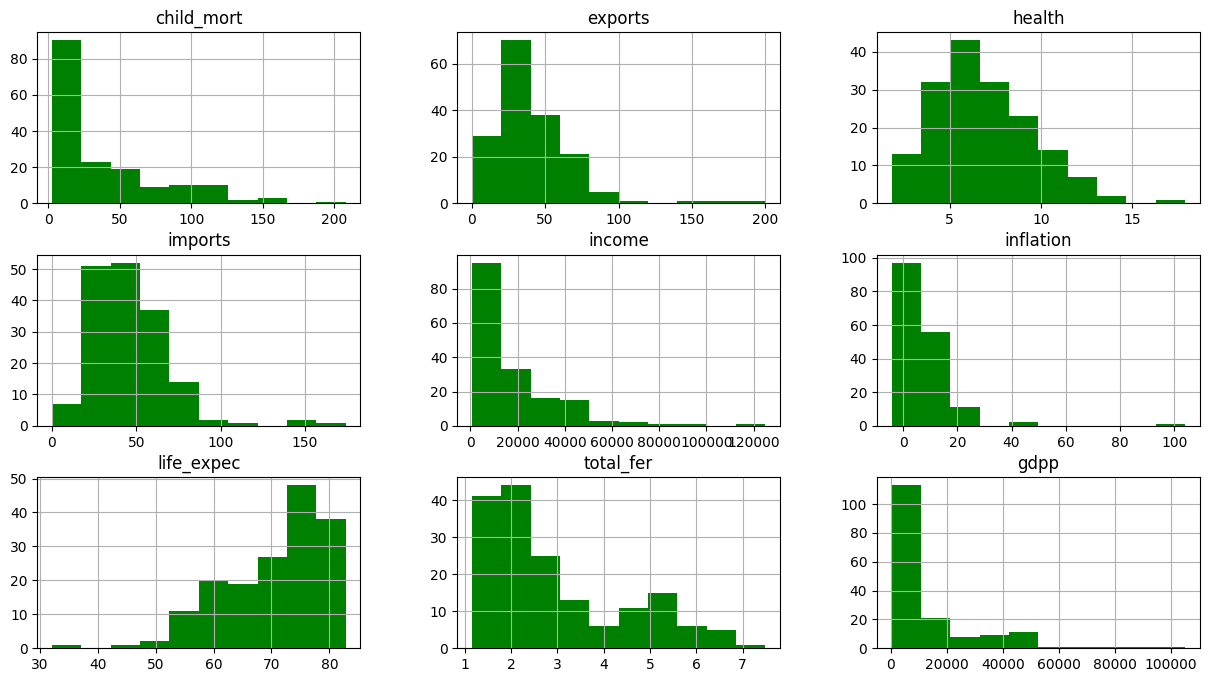

In [240]:
fig = plt.figure(figsize = (15,8))
ax = fig.gca()
country_df.hist(ax=ax, color = 'green')

plt.show()

Observing these histograms we can say most of the variables don't have a normal distribution.
There are some variables with strong correlation (ex : life_expec, income and total_fer) .
life_expec displays a negatively skewed data distribution.
health displays a normally distribution.
All the remaining features show positively skewed data distribution.
Data distribution of country is not put out as it has text data and it has the same number of unique values as the length of the dataframe.

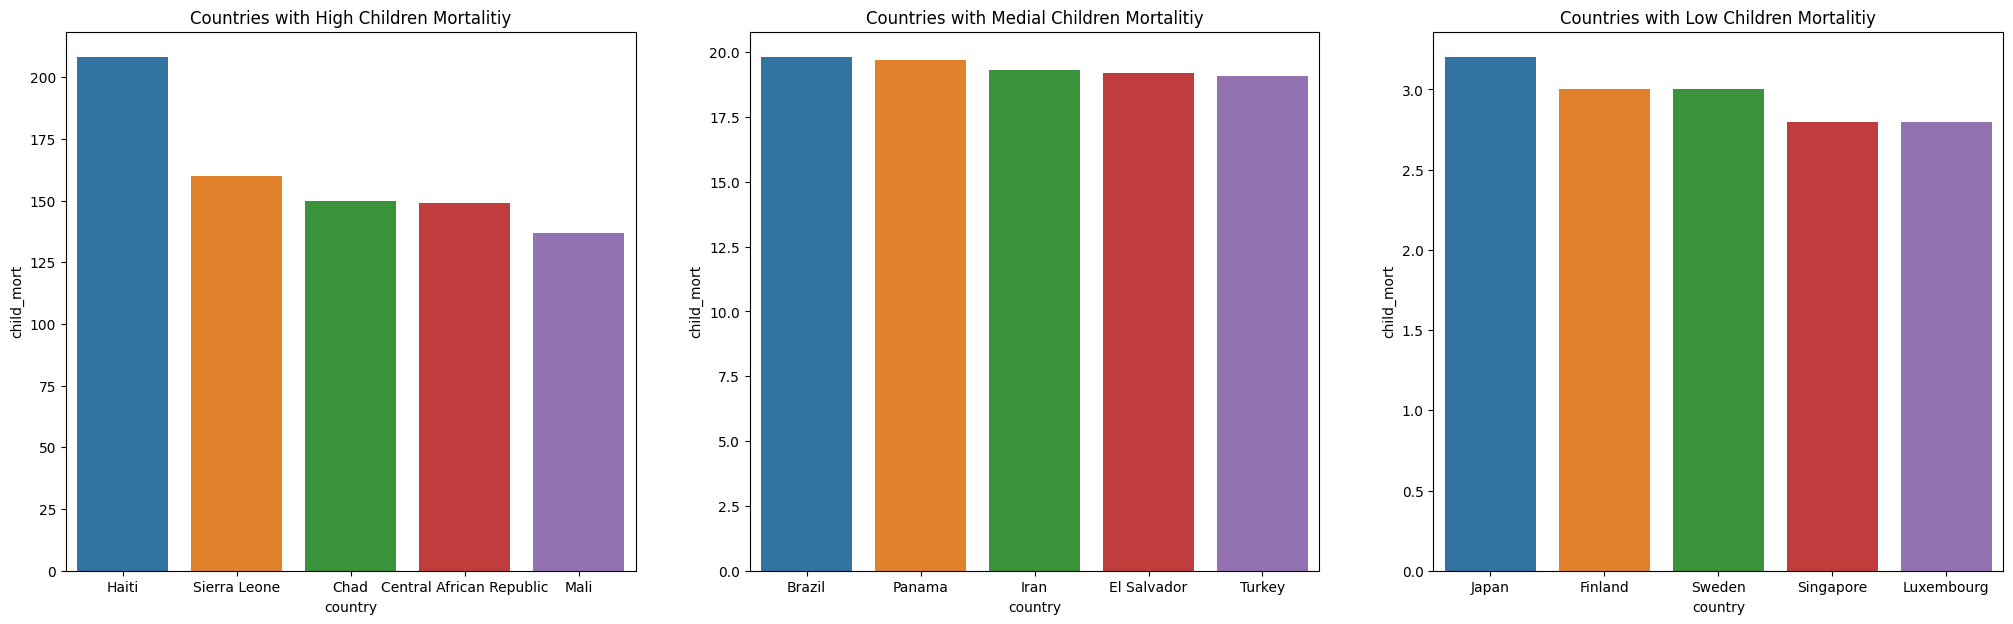

In [241]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'child_mort', data = country_df.sort_values(ascending = False,by = 'child_mort').iloc[:5]);
plt.title('Countries with High Children Mortalitiy')

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'child_mort', data = country_df.sort_values(ascending = False,by = 'child_mort').iloc[81:86]);
plt.title('Countries with Medial Children Mortalitiy')

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'child_mort', data = country_df.sort_values(ascending = False,by = 'child_mort').iloc[161:166]);
plt.title('Countries with Low Children Mortalitiy')

plt.show()

Haiti has the highest child mortality rate. African countries are at higher positions in this statistic.
At the other extreme of child_mort, countries Japan and from Europe are present

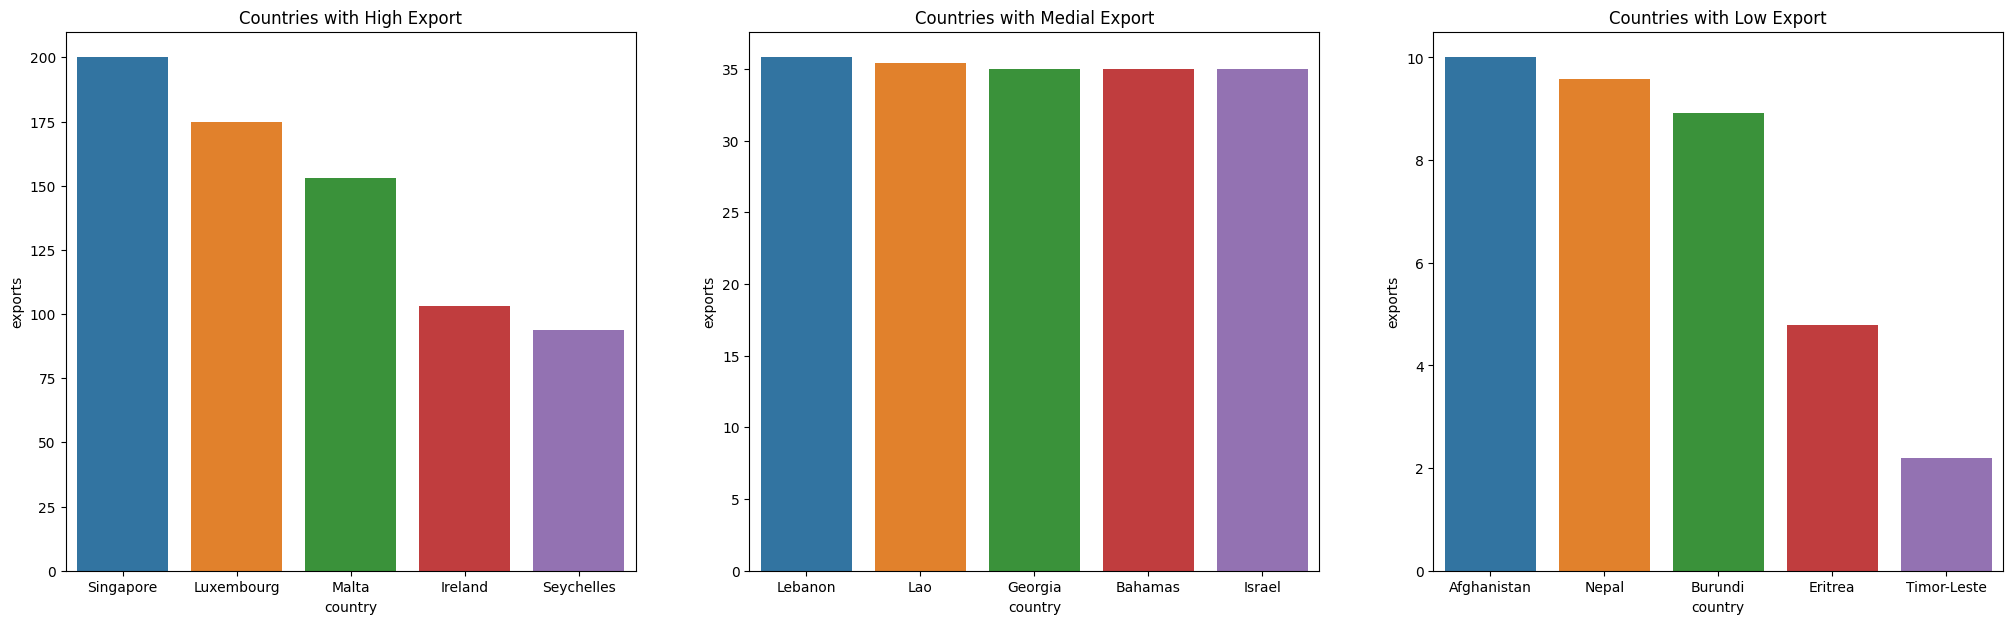

In [243]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'exports', data = country_df.sort_values(ascending = False,by = 'exports').iloc[:5]);
plt.title('Countries with High Export')

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'exports', data = country_df.sort_values(ascending = False,by = 'exports').iloc[81:86]);
plt.title('Countries with Medial Export')

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'exports', data = country_df.sort_values(ascending = False,by = 'exports').iloc[161:166]);
plt.title('Countries with Low Export')

plt.show()

Singapore's  have the highest number of exports. Luxembourg & Malta have followed the position.
Afghanistan & Nepal are in the lower end of exports. Geographical locations of these nations have a heavy influence. Countries with lower exports also have small geographical area.

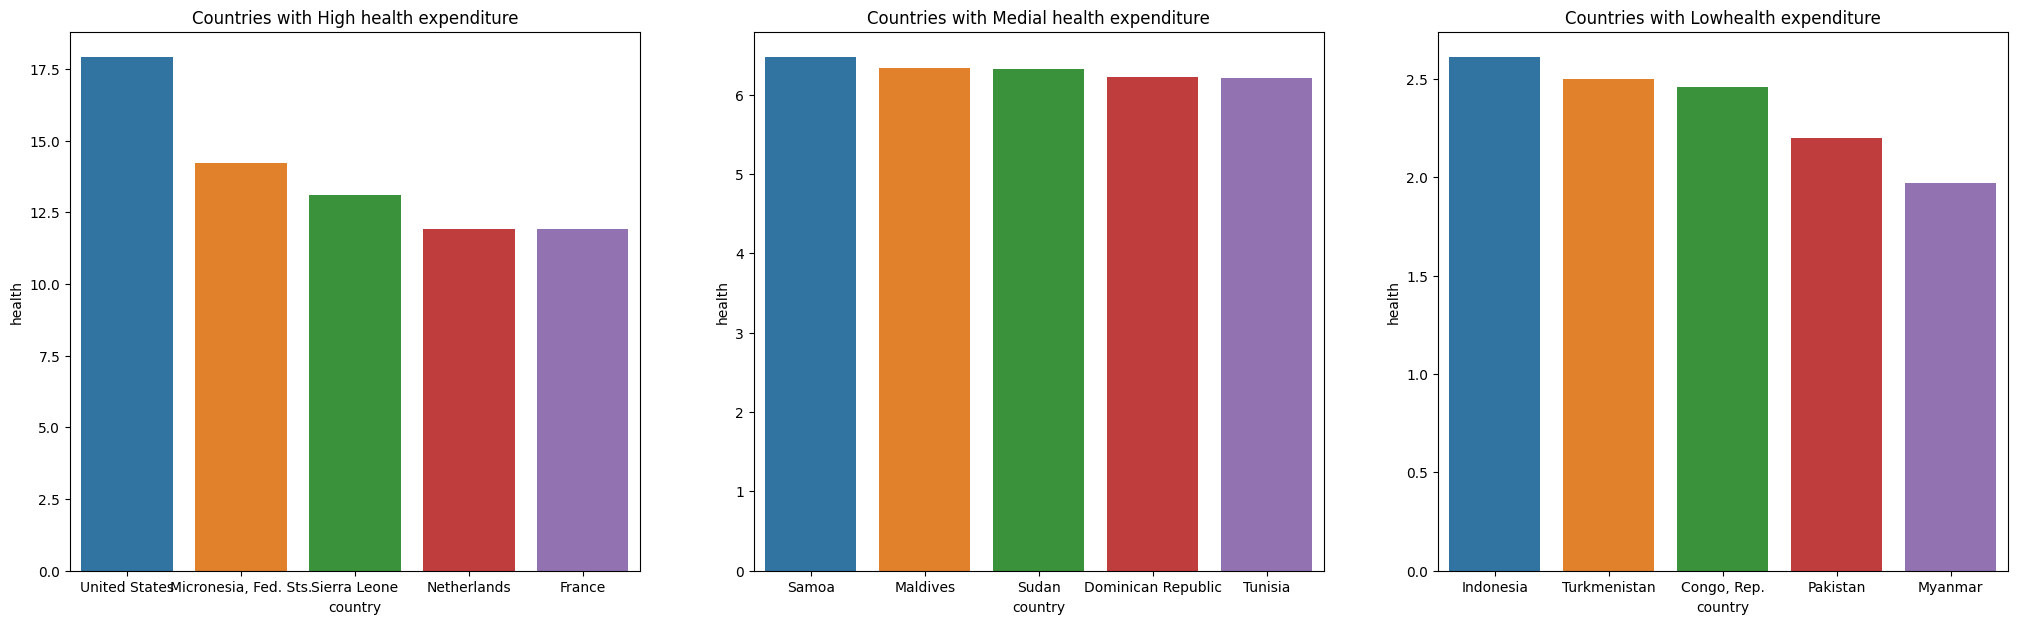

In [244]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'health', data = country_df.sort_values(ascending = False,by = 'health').iloc[:5]);
plt.title('Countries with High health expenditure')

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'health', data = country_df.sort_values(ascending = False,by = 'health').iloc[81:86]);
plt.title('Countries with Medial health expenditure')

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'health', data = country_df.sort_values(ascending = False,by = 'health').iloc[161:166]);
plt.title('Countries with Lowhealth expenditure')

plt.show()

Unite States is at the top position in terms of spending on health with 17% of the individual GDP contribution.
6% seems to be the average values of the citizens spending on their health in group 2 countries.
Asian countries like Pakistan, Indonesia and Myanmar are found in the lower end of health expenditure with less than 3%. 

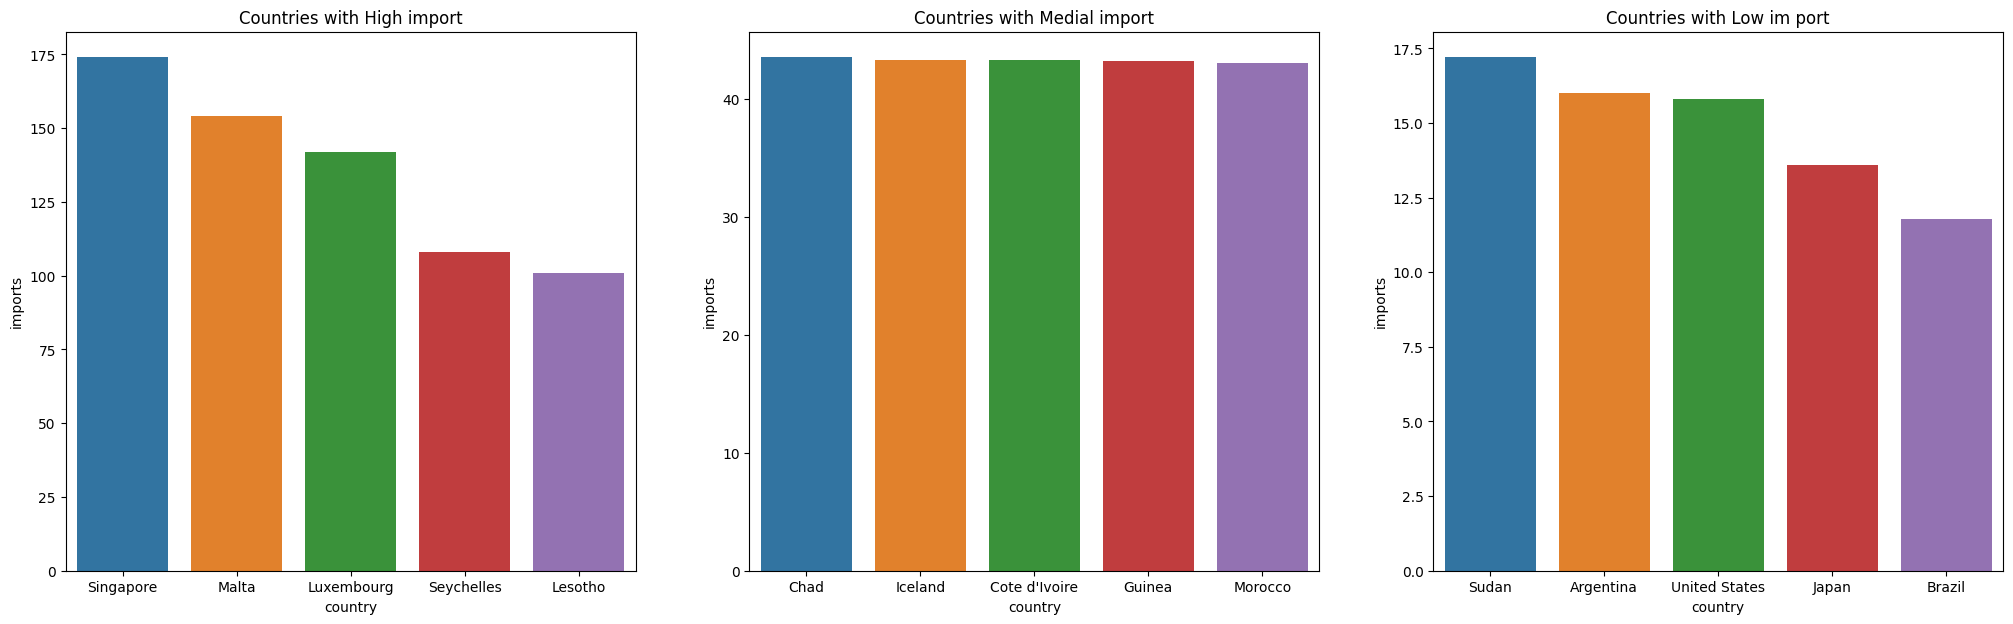

In [245]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'imports', data = country_df.sort_values(ascending = False,by = 'imports').iloc[:5]);
plt.title('Countries with High import')

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'imports', data = country_df.sort_values(ascending = False,by = 'imports').iloc[81:86]);
plt.title('Countries with Medial import')

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'imports', data = country_df.sort_values(ascending = False,by = 'imports').iloc[161:166]);
plt.title('Countries with Low im port')

plt.show()

Singapore, Malta, Luxembourg & Seychelles are present in the top 5 of exports as well as imports. This is just an indication that highlight the nation's strategies of probably capitalizing on their resources and creating solid exports that gets countered by the heavy imports on something else. This just balances the books!
Brazil has the lowest imports out of all the nations with 11%. Sudan is the only African country present in this lower end list with 17%.

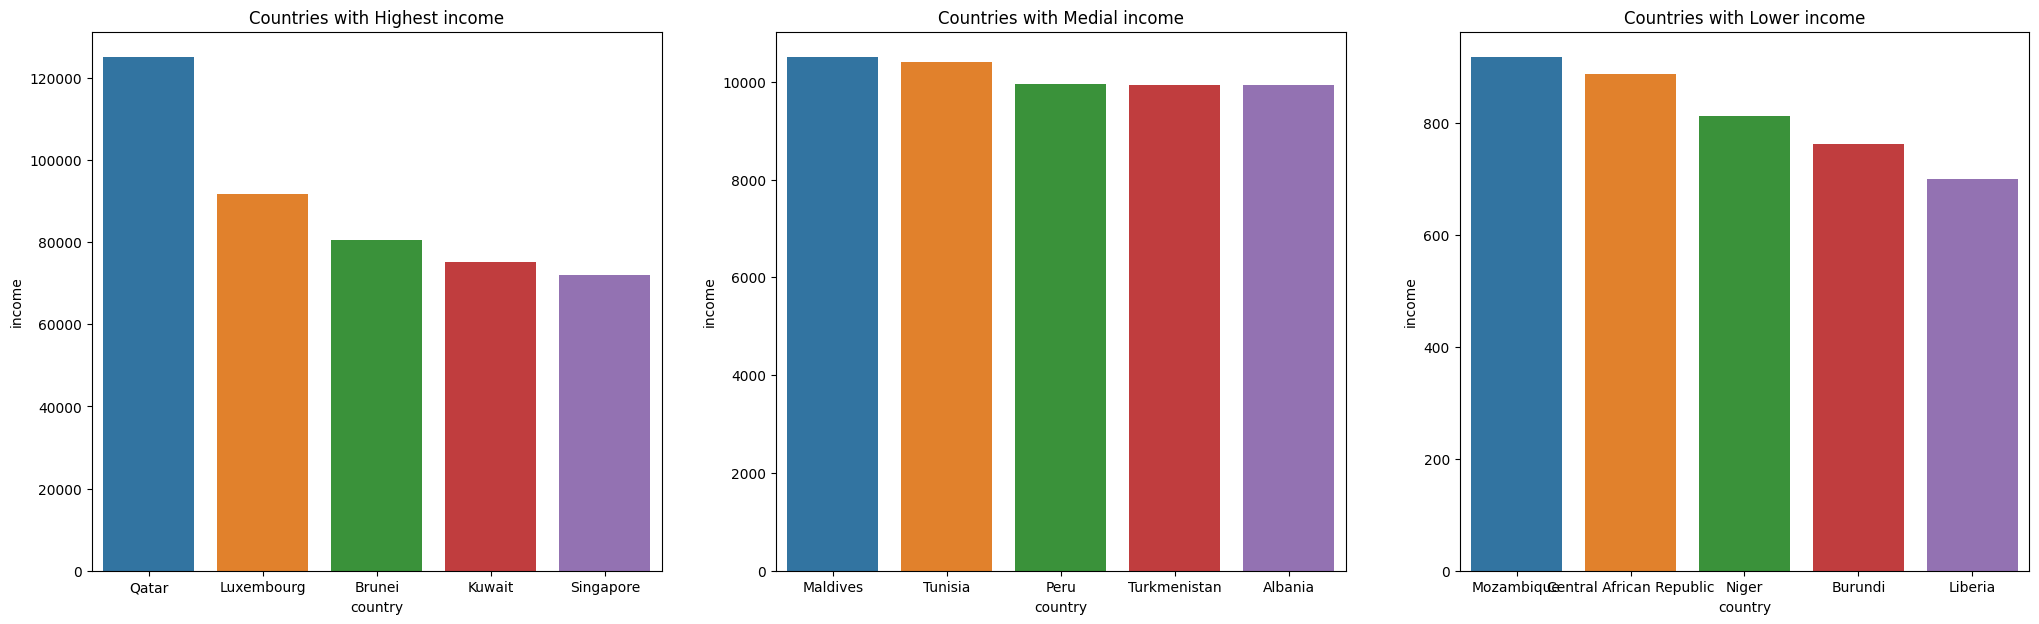

In [246]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'income', data = country_df.sort_values(ascending = False,by = 'income').iloc[:5]);
plt.title('Countries with Highest income')

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'income', data = country_df.sort_values(ascending = False,by = 'income').iloc[81:86]);
plt.title('Countries with Medial income')

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'income', data = country_df.sort_values(ascending = False,by = 'income').iloc[161:166]);
plt.title('Countries with Lower income')

plt.show()

people of Qatar have the highest income out of all the countries. Singapore & Luxembourg are again present here in the top 5 country.
Lower end of the income is dominated by the African nations. 

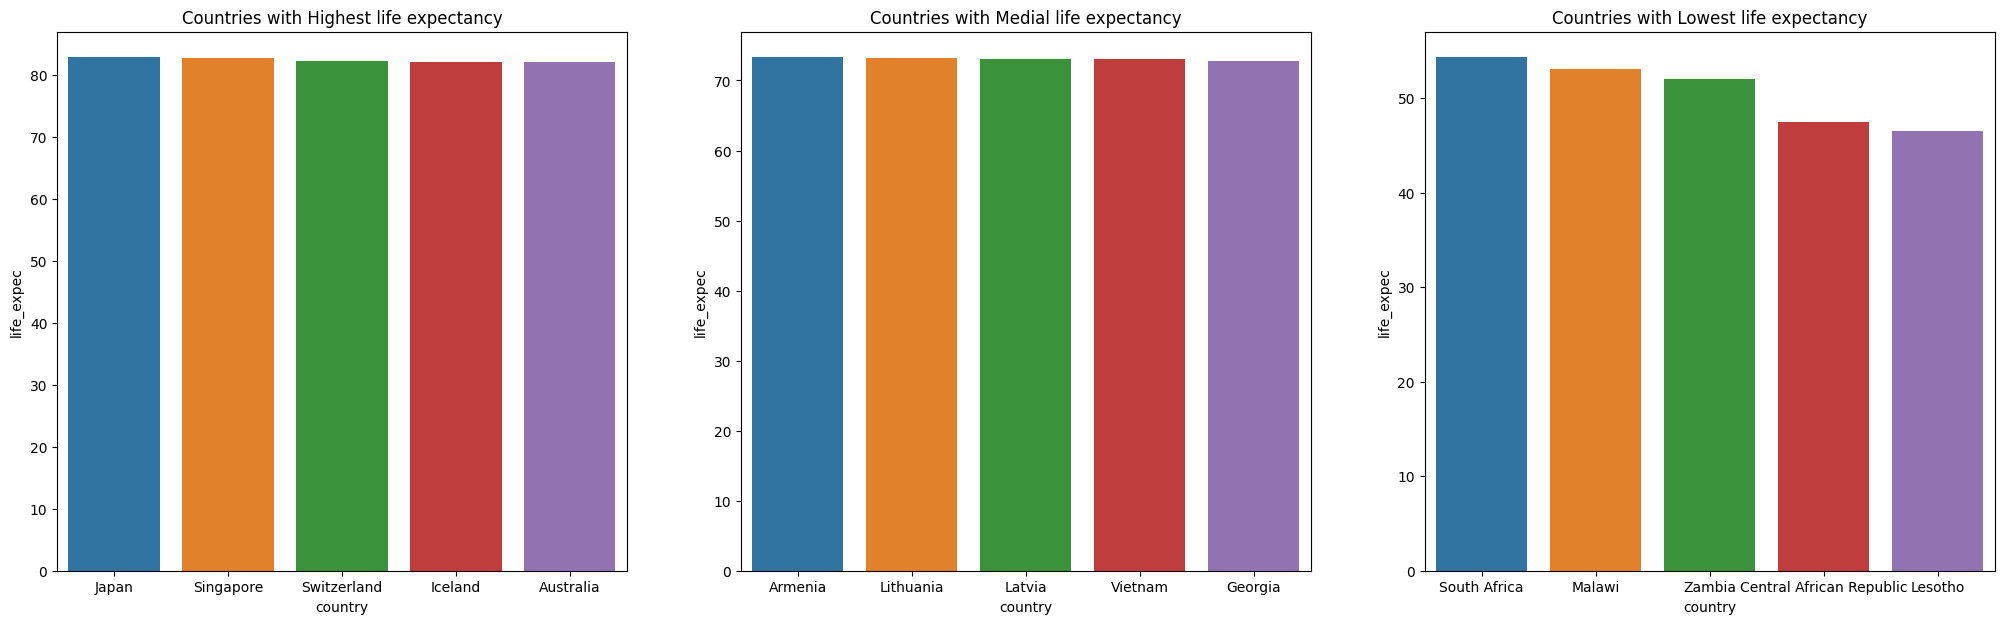

In [247]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'life_expec', data = country_df.sort_values(ascending = False,by = 'life_expec').iloc[:5]);
plt.title('Countries with Highest life expectancy')

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'life_expec', data = country_df.sort_values(ascending = False,by = 'life_expec').iloc[81:86]);
plt.title('Countries with Medial life expectancy')

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'life_expec', data = country_df.sort_values(ascending = False,by = 'life_expec').iloc[161:166]);
plt.title('Countries with Lowest life expectancy')

plt.show()

japan ans singapore on top
african countries dominate the lower end

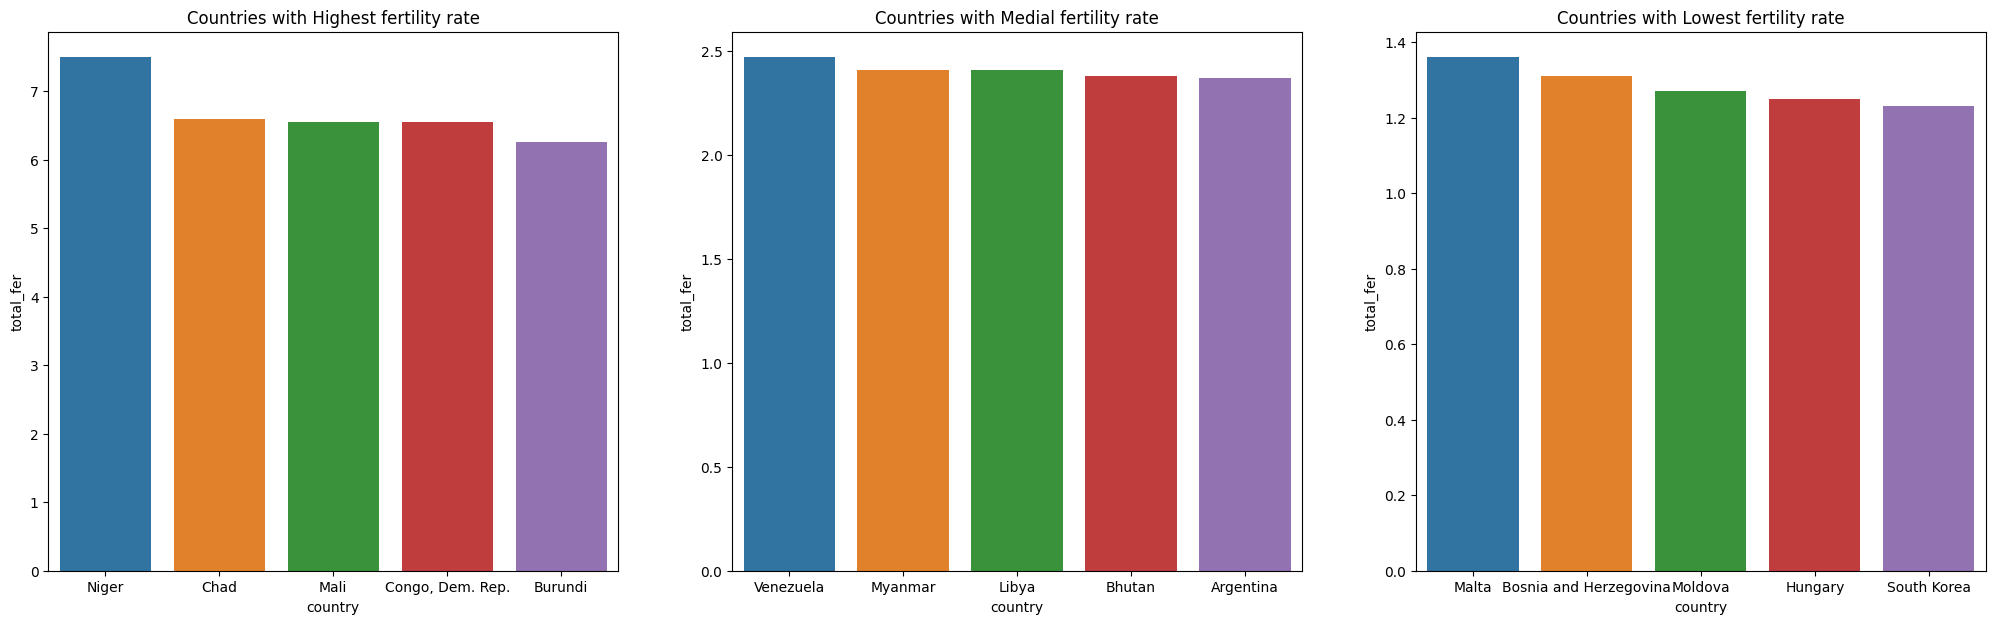

In [250]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'total_fer', data = country_df.sort_values(ascending = False,by = 'total_fer').iloc[:5]);
plt.title('Countries with Highest fertility rate')

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'total_fer', data = country_df.sort_values(ascending = False,by = 'total_fer').iloc[81:86]);
plt.title('Countries with Medial fertility rate')

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'total_fer', data = country_df.sort_values(ascending = False,by = 'total_fer').iloc[161:166]);
plt.title('Countries with Lowest fertility rate')

plt.show()

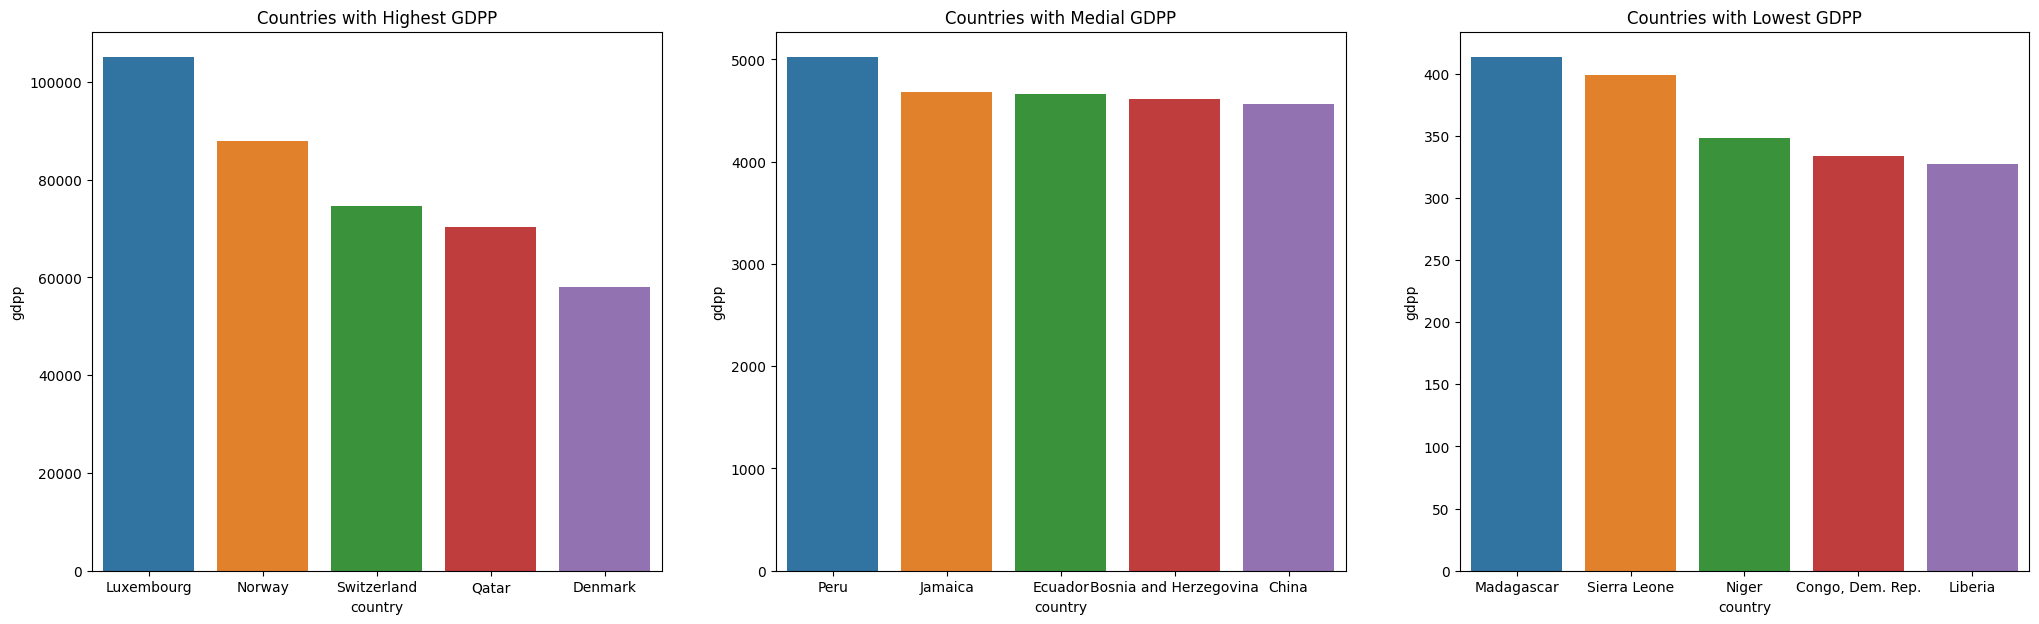

In [249]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'gdpp', data = country_df.sort_values(ascending = False,by = 'gdpp').iloc[:5]);
plt.title('Countries with Highest GDPP')

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'gdpp', data = country_df.sort_values(ascending = False,by = 'gdpp').iloc[81:86]);
plt.title('Countries with Medial GDPP')

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'gdpp', data = country_df.sort_values(ascending = False,by = 'gdpp').iloc[161:166]);
plt.title('Countries with Lowest GDPP')

plt.show()


Luxembourg is again present in the top ranks. Switzerland & Qatar are present in the top 5 similar to income.
Lower end is again dominated by African nations that labels them as the  in economical need

In [ ]:
columns = list(country_df.columns)
columns
numerical_cols = columns[1:]
categorical_cols = ['country']


In [ ]:
corr_matrix = country_df.corr()
corr_matrix

C:\Users\shazi\AppData\Local\Temp\ipykernel_34364\3730824995.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


<AxesSubplot: >

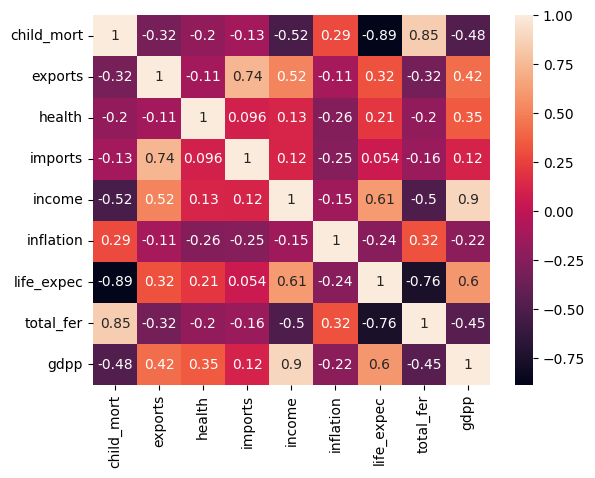

In [ ]:
sns.heatmap(corr_matrix, annot=True)

Fertility rate (total-fer) and child mortality(child_mort) show 85% of positive correlation. besides, Life Expectancy (life_expec) has a strong negative relation with child mortality.
Imports and Exports have a 74% positive correlation in this data. while total fertility anf life expectancy are negatively related.

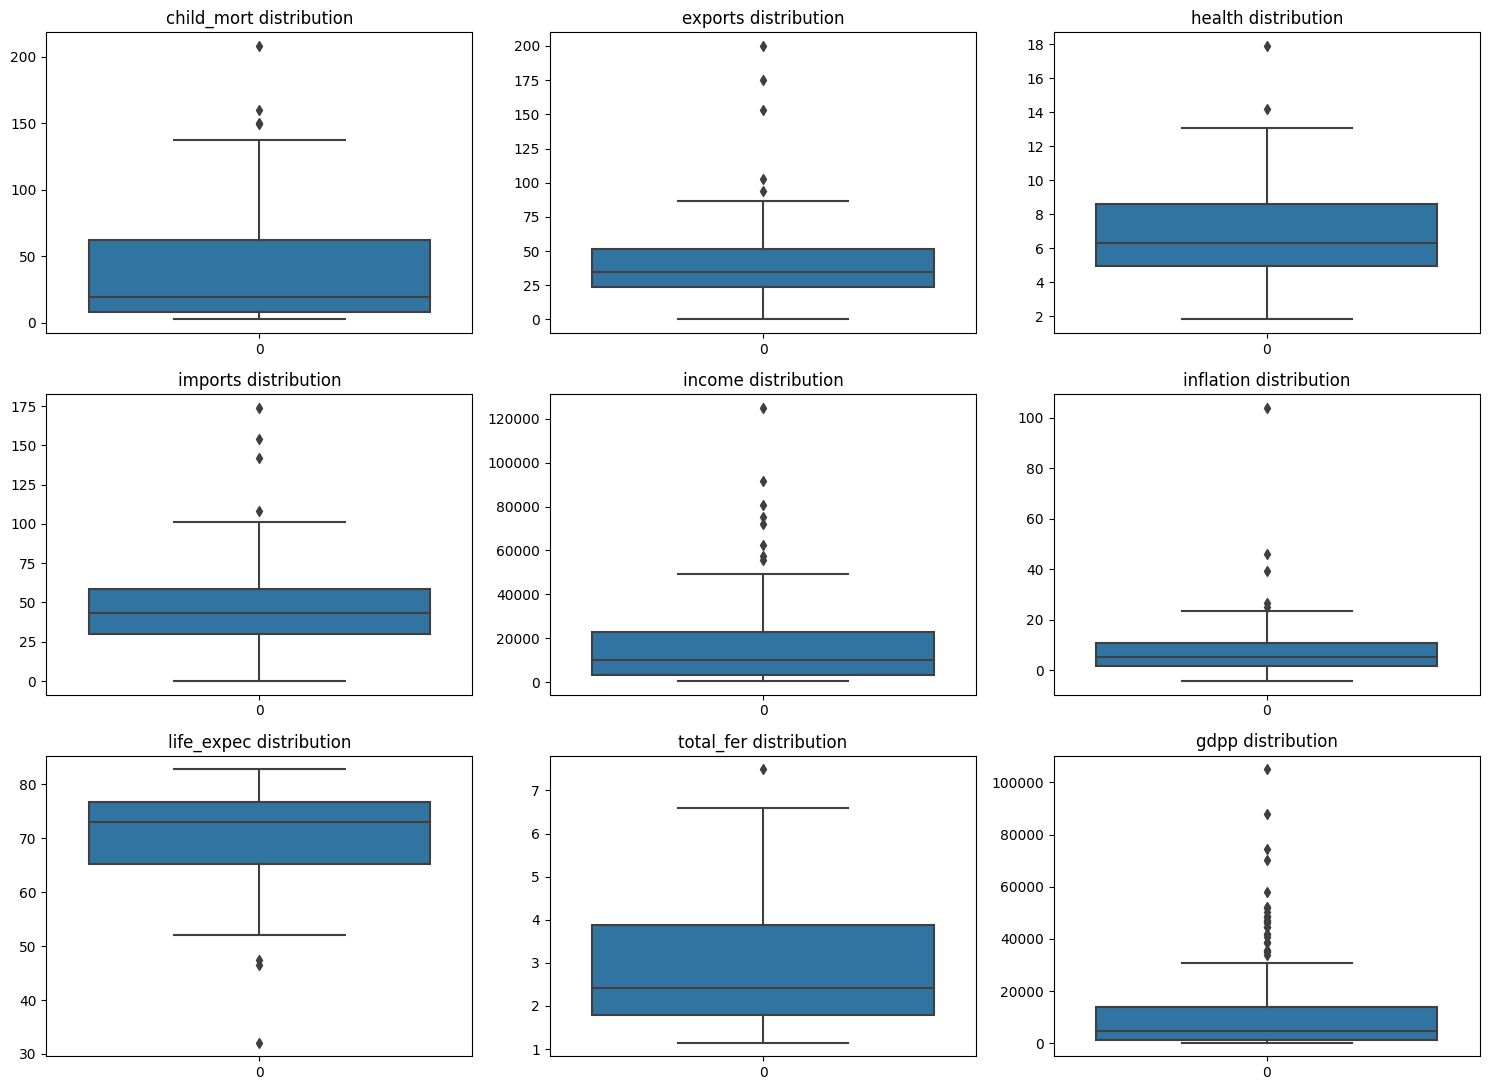

In [ ]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15,11))
for i in range(len(numerical_cols)):
  plt.subplot(3,3,i+1)
  sns.boxplot(country_df[numerical_cols[i]])
  title = numerical_cols[i] + ' distribution'
  plt.title(title)
plt.tight_layout()
plt.show()

SCALING DATA
Every variables has a wide range for the values.Example 'income'  goes from 100s to 10000s, when compared  to 'health', that is in the range of 10s.
While modelling, the algorithm might give more priorities to variables which have higher range of values. This leads to bias in model building, which needs to be corrected.
StandardScaler is used in this analysis as i feel most features are normally distributed, so the values of all features will be scaled in such a way that the mean and standard deviation become 0 and 1 respectively for each feature.

In [ ]:
data = country_df.drop("country", axis=1)
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
scale = StandardScaler()
X_scaled = scale.fit_transform(data)
X_scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [ ]:
df_scaled  = pd.DataFrame(X_scaled,columns=data.columns)
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


MODEL SELECTION and impletation- KMEANS clustering
UNSUPERVISED LEARNING : It is a problem where the target variable is not known. 
Thus, searching for patterns by using visualization techniques provides us with some underlying insight that cannot be understood by staring into the tabular data.
However, when the size of the datasets becomes huge with too many features, data visualization can be a tedious task to execute. Hence, we move towards the algorithmic approach.


In [ ]:
Wcss=[]
x = range(1,10)
for i in x:
    kmeans=KMeans(n_clusters=i,n_init=10,random_state=9)
    kmeans.fit(df_scaled)
    Wcss.append(kmeans.inertia_)
print(Wcss)

[1503.0000000000002, 1050.2145582853304, 831.4244352086874, 700.5205369722204, 632.0321498875281, 563.5365959435846, 495.503025054588, 460.4220376827277, 421.74405351225977]


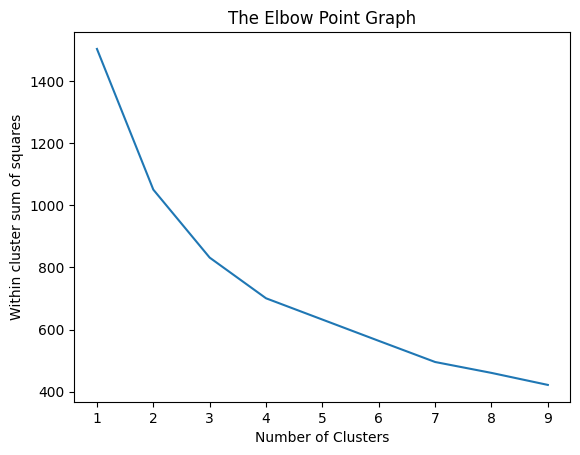

In [ ]:
plt.plot(x,Wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within cluster sum of squares')
plt.title('The Elbow Point Graph')
plt.show()

The spike change at some point shows the best number of clusters. So curve at the 3 clusters shows elbow like shape can be seen , so k=3 is chosen as Optimal no fo clusters 

In [ ]:
kmeans=KMeans(n_clusters=3,n_init=10,random_state=9)
y_pred=kmeans.fit_predict(df_scaled)

print("WCSS: ", kmeans.inertia_)
print("Iternations until converged: ", kmeans.n_iter_)
print("Final centroids: ", kmeans.cluster_centers_)
print("Cluster assignments ", kmeans.labels_)


WCSS:  831.4244352086874
Iternations until converged:  9
Final centroids:  [[ 1.36021776 -0.43753313 -0.15598401 -0.18920377 -0.68689408  0.40211078
  -1.28217981  1.36494385 -0.60424243]
 [-0.40645337 -0.03165259 -0.2244709   0.02416161 -0.25177041 -0.01716742
   0.25473362 -0.42434279 -0.35448141]
 [-0.82744866  0.64507985  0.72741122  0.19063895  1.48424268 -0.48492064
   1.07957853 -0.79187687  1.61599536]]
Cluster assignments  [0 1 1 0 1 1 1 2 2 1 1 2 1 1 1 2 1 0 1 1 1 0 1 2 1 0 0 1 0 2 1 0 0 1 1 1 0
 0 0 1 0 1 2 2 2 1 1 1 1 0 0 1 1 2 2 0 0 1 2 0 2 1 1 0 0 1 0 1 2 1 1 1 0 2
 2 2 1 2 1 1 0 0 2 1 0 1 1 0 0 1 1 2 1 0 0 1 1 0 2 0 1 1 1 1 1 1 0 1 0 1 2
 2 0 0 2 1 0 1 1 1 1 1 2 2 1 1 0 1 1 0 1 1 0 2 2 2 1 0 2 2 1 1 0 1 2 2 1 0
 1 0 0 1 1 1 1 0 1 2 2 2 1 1 1 1 1 0 0]


In [ ]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [ ]:
country_df['Cluster']=y_pred
country_df.reset_index(drop = True, inplace = True)
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


adding the y_pred as column name 'cluster' in our original dataset

In [ ]:
country_df.Cluster.value_counts()

1    84
0    47
2    36
Name: Cluster, dtype: int64

out of 167, more than 50 percent fall in 1 cluster

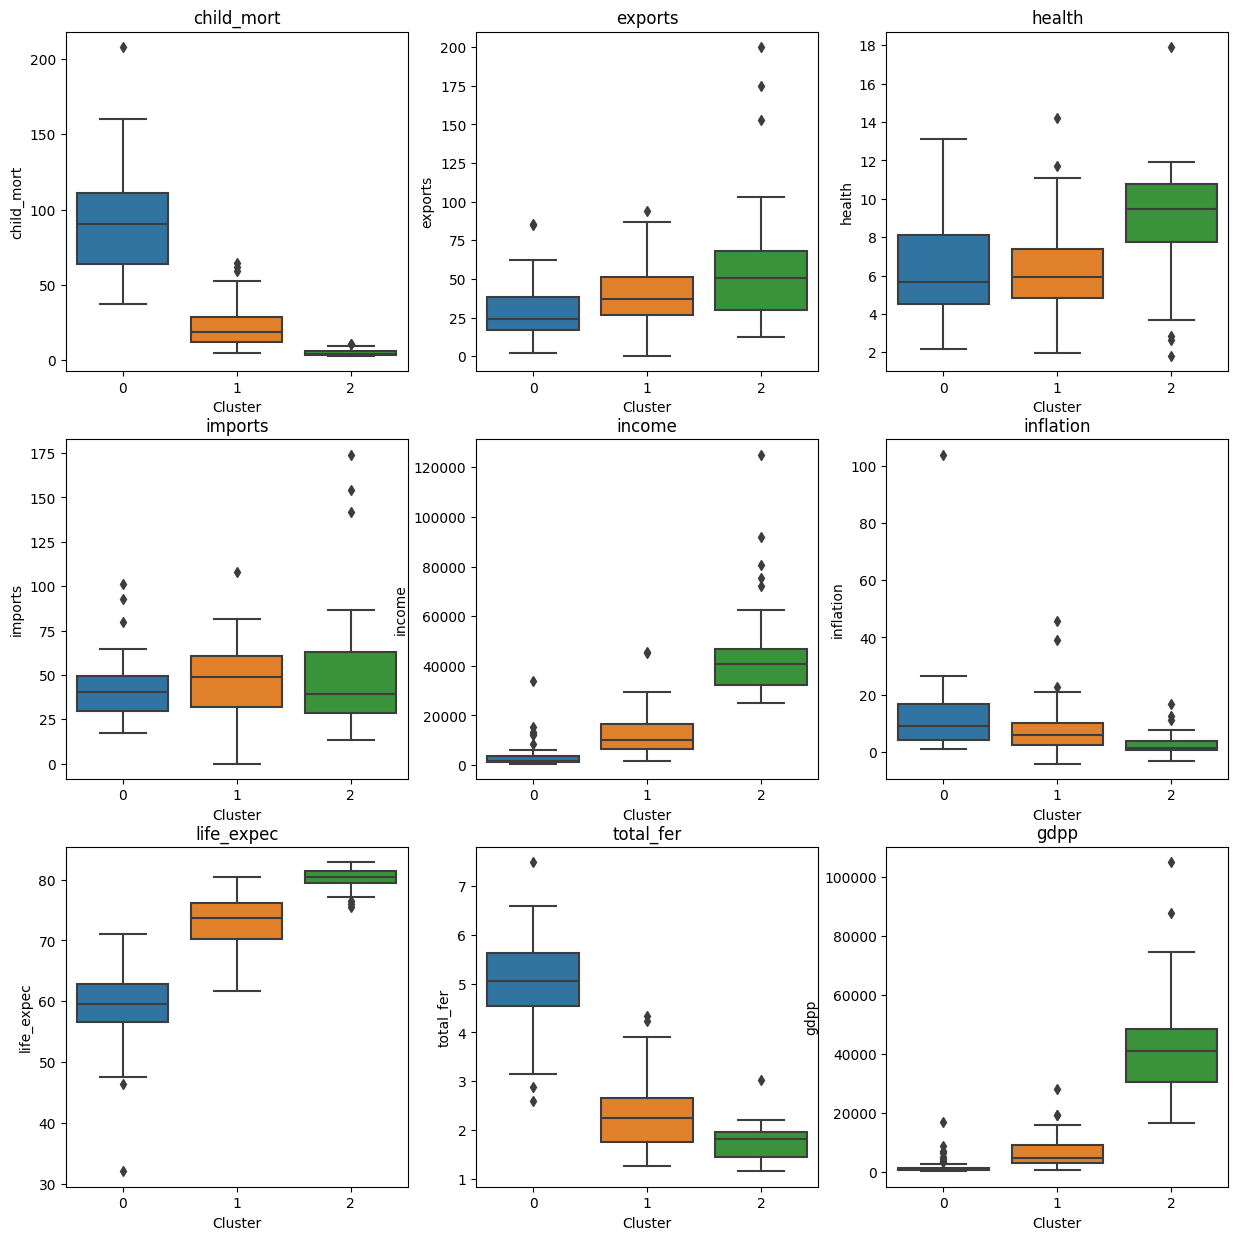

In [ ]:
l=['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
plt.figure(figsize=(15,15))
for i in range(len(l)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=country_df.Cluster,y=country_df[l[i]])
    plt.title(l[i])

Cluster 0 has countries with higher child mortality, and fertility rates.
Cluster 2 on the other hand has the lowest average of child mortality and tota fertility rates and better gdpp, income, imports and exports
more inflation in cluster 0

In [ ]:
means_of_clusters = pd.DataFrame(country_df.groupby('Cluster').agg({'gdpp':'mean', 'income':'mean', 'inflation':'mean', 'exports':'mean', 'imports':'mean',\
                                     'health':'mean', 'child_mort':'mean', 'life_expec':'mean', 'total_fer':'mean'}))
means_of_clusters.sort_values(by = ['child_mort', 'total_fer', 'health', 'life_expec', 'income'],\
                                    ascending = [False, False, True, True, True])

,gdpp,income,inflation,exports,imports,health,child_mort,life_expec,total_fer
Cluster,,,,,,,,,
0,1922.382979,3942.404255,12.019681,29.151277,42.323404,6.388511,92.961702,59.187234,5.008085
1,6486.452381,12305.595238,7.600905,40.243917,47.473404,6.200952,21.927381,72.814286,2.307500
2,42494.444444,45672.222222,2.671250,58.738889,51.491667,8.807778,5.000000,80.127778,1.752778


Based on this observation, we can conclude that Cluster 0 is going to be the target group of countries that require more help as charity.

Cluster 0 -> Require most charity help
Cluster 1 -> May require some charity help
Cluster 2 -> can do without any help from charity

In [ ]:
cl_0=country_df[country_df['Cluster']==0]
cl_0

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,0
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,0
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,0
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,0
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,0
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,0
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,0


In [ ]:
cl_1=country_df[country_df['Cluster']==1]
cl_1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,1
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,1
...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900,1
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,1
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1


In [ ]:
cl_2=country_df[country_df['Cluster']==2]
cl_2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,2
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,2
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,2
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,2
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,2
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,2
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,2
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,2


In [ ]:
import plotly.express as px

!pip install -U kaleido

import kaleido

InvalidIndexError: (array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False,  True,  True,
       False,  True, False, False,  True,  True, False, False, False,
        True,  True,  True, False,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False,  True,  True, False, False,  True, False, False, False,
        True,  True, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
        True, False, False,  True, False, False,  True,  True, False,
       False, False, False,  True,  True, False, False,  True, False,
        True, False, False, False, False, False, False,  True, False,
        True, False, False, False,  True,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False,  True, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False,  True, False,  True,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True,  True]), slice(None, None, None))

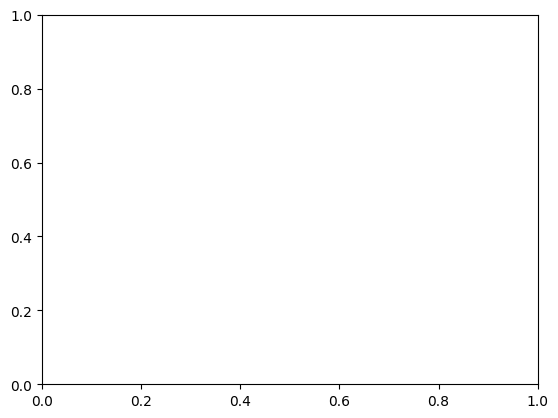

In [ ]:
fig, ax = plt.subplots()
idxs = np.unique(kmeans.labels_)

for i in idxs:
    #Points of cluster
    points = data[kmeans.labels_==i,:]
    #Plot points
    plt.scatter(points[:,0], points[:,9])
    #Plot centroids
    plt.scatter(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1], s=100, c='red')

#Aesthetics    
ax.set_title('K-Means clustering')
ax.set_xlabel(country_df[0])
ax.set_ylabel(country_df[9])

In [ ]:
fig = px.choropleth(country_df[['country','Cluster']],
                    locationmode='country names',
                    locations='country',
                     title='Help Needed most in the different country (World)',
                     color=country_df['Cluster'])
fig.update_geos(fitbounds="locations", visible=True)

fig.show(engine='kaleido')

CONCLUSION

The above visualization shows that majority of countries that need major help from charity (cluster 0) are concentrated in Central Africa and few countries are in Asia and Middle East.
Most countries in Asia and South America are in cluster 1 and may require  some help from charity. However, some Middle East countries like Algeria, Libya, Turkey, saudi arabia and some European nations like poland, Belarus, Ukraine, Serbia, Croatia and Romania  also fall in this cluster 1.
There are other countries like United States of America, Australia, Japan, Canada and United kingdom and few european countries in cluster 2 that dont need any help 
The Exploratory Data Analysis carried out has shown important insights and trends in the socio-economic factors.
Standardization or normalization of the data has effected the model performance. Thus, this step is important before fitting the data to the model.
This dataset required Unsupervised Learning, and I considered only KMeans Clustering as the algorithm for my analysis. Other clustering techniques like Hierarchical Clustering etc. can be used, which might have given better accuracy.